In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import os

In [3]:
with open('data/twitter-swisscom/create_twitter_total.pickle','rb') as c:
    create_twitter = pickle.load(c)

In [13]:
twitter_info=create_twitter.userId.reset_index()
twitter_info['createdAt']=create_twitter['createdAt'].tolist()
twitter_info['placeId']=create_twitter['placeId'].tolist()
twitter_info['weekday']=create_twitter['weekday'].tolist()
twitter_info['day']=create_twitter['day'].tolist()
twitter_info['hour']=create_twitter['hour'].tolist()
twitter_info['month']=create_twitter['month'].tolist()
del twitter_info['index']

In [14]:
twitter_info.head()

,userId,createdAt,placeId,weekday,day,hour,month
0,30445147,2013-04-24 01:42:07,508f024bc856afc5,2,24,1,4
1,1136150214,2013-04-24 01:42:39,d969dab4efecff93,2,24,1,4
2,853308949,2013-04-24 01:42:44,a573c842499b9471,2,24,1,4
3,1136150214,2013-04-24 01:43:01,d969dab4efecff93,2,24,1,4
4,1136150214,2013-04-24 01:44:13,d969dab4efecff93,2,24,1,4


calculate the total number of each user posted.

In [15]:
twitter_num=twitter_info[['createdAt','userId']].groupby('userId').count()

In [16]:
twitter_dict=twitter_num['createdAt'].to_dict()

In [17]:
twitter_info['twitternum'] = twitter_info['userId'].map(twitter_dict)

In [18]:
twitter_num_sort=twitter_num.sort(['createdAt'],ascending=False)
twitter_num_sort.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,createdAt
userId,
776912815,142755
81372836,77117
431865253,61073
74506350,56466
541668935,48739


In [47]:
twitter_num_sort[twitter_num_sort.createdAt > 10].shape

(88008, 1)

plot the  scatter based  on the  number of  twitter 

In [41]:
with open("data/twitter-swisscom/userId_x_numTW.pickle", "wb") as f:
    pickle.dump(twitter_num_sort, f)

In [39]:
twitter_num_sort.head()

,createdAt
userId,
776912815,142755
81372836,77117
431865253,61073
74506350,56466
541668935,48739


In [64]:
top_5_per = twitter_num_sort.iloc[:int(twitter_num_sort.shape[0]*0.05)]

In [68]:
top_5_per.sum() / twitter_num_sort.sum()

createdAt    0.836431
dtype: float64

In [70]:
top_5_per.iloc[-1]

createdAt    120
Name: 356221366, dtype: int64

In [66]:
top_5_per.shape

(18019, 1)

In [56]:
t = twitter_num_sort.sum()

In [58]:
num_people = twitter_num_sort[twitter_num_sort.createdAt > 100]

In [62]:
num_people.shape[0]/twitter_num_sort.shape[0]

0.05684000221987902

In [57]:
twitter_num_sort[twitter_num_sort.createdAt > 100].sum() / t

createdAt    0.849991
dtype: float64

In [28]:
userid=np.arange(360380)
twitternum=np.array(twitter_num_sort.ix[:,0])

In [31]:
twitternum = np.log(twitternum)

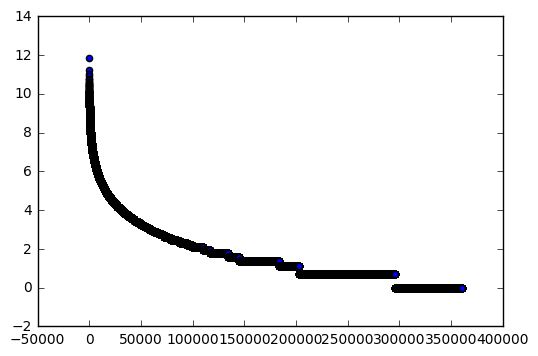

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(userid,twitternum)

In [34]:
twitter_series=twitter_num_sort.ix[:,0]
twitter_count=twitter_series.reset_index()

In [35]:
totel_number=twitter_count['createdAt'].sum()
twitter_count_20=twitter_count.ix[:72076,:]
part_number=twitter_count_20['createdAt'].sum()
ratio= part_number/totel_number

In [36]:
ratio

0.94689248624127842

The result shows that  most  twitter  are posted by a little part of users, which is similar as  long-tail  effect

bias analysis

In [37]:
twitter_geo_bias=twitter_info.groupby(['userId','placeId'])[['twitternum']].count() 

In [114]:
tmp = twitter_geo_bias.reset_index()

In [120]:
tmp1 = geo_info.reset_index()

In [123]:
c = pd.merge(tmp, tmp1, on='placeId')

In [156]:
twitter_geo_bias.loc[246].apply(np.argmax)

twitternum    f22db8cc2a4d9dfb
dtype: object

In [155]:
twitter_geo_bias.loc[246].apply(np.max)

twitternum    8
dtype: int64

In [171]:
userIds = twitter_info.userId.unique()

In [172]:
userIds.shape

(360380,)

In [184]:
a = pd.Series(np.arange(10))
b = pd.Series(np.arange(10))

In [186]:
c = zip(a, b)

In [191]:
import collections

In [223]:
d = collections.namedtuple('foo', ['x', 'y'])

In [224]:
e = d('100', 10)

In [225]:
e.x

'100'

In [222]:
tmp = twitter_geo_bias.reset_index()
tmp.head()

,userId,placeId,twitternum
0,246,068c70be7b3a4cc2,2
1,246,bcd0c4fcff4216c1,1
2,246,dd26be6f16473902,4
3,246,f22db8cc2a4d9dfb,8
4,259,05f39a968c45748d,1


In [226]:
tmp1 = tmp.apply(lambda x: d(x.loc['placeId'], x.loc['twitternum']), axis=1)

In [228]:
tmp['composite'] = tmp1

In [236]:
hasattr(e, 'z')

False

In [296]:
def foo(inp):
    a = np.argmax([i.y for i in inp])
    return inp.iloc[a]

In [297]:
user_x_residence_df = tmp[:].groupby('userId').aggregate({'composite': foo})

In [306]:
tmp

,userId,placeId,twitternum,composite
0,246,068c70be7b3a4cc2,2,"(068c70be7b3a4cc2, 2)"
1,246,bcd0c4fcff4216c1,1,"(bcd0c4fcff4216c1, 1)"
2,246,dd26be6f16473902,4,"(dd26be6f16473902, 4)"
3,246,f22db8cc2a4d9dfb,8,"(f22db8cc2a4d9dfb, 8)"
4,259,05f39a968c45748d,1,"(05f39a968c45748d, 1)"
5,259,068c70be7b3a4cc2,3,"(068c70be7b3a4cc2, 3)"
6,259,0ea7af39d11e19e7,1,"(0ea7af39d11e19e7, 1)"
7,259,384df7b39fc369c8,1,"(384df7b39fc369c8, 1)"
8,259,3acb748d0f1e9265,7,"(3acb748d0f1e9265, 7)"
9,259,51ae948e08959af7,6,"(51ae948e08959af7, 6)"


In [ ]:
user_x_residence_df['placeId'] = user_x_residence_df.apply(lambda x: ([i.x for i in x]), axis=1)

In [308]:
user_x_residence_df.head()

,composite,placeId
userId,,
246,"(f22db8cc2a4d9dfb, 8)",f22db8cc2a4d9dfb
259,"(3acb748d0f1e9265, 7)",3acb748d0f1e9265
456,"(c3a6437e1b1a726d, 3)",c3a6437e1b1a726d
577,"(068c70be7b3a4cc2, 1)",068c70be7b3a4cc2
821,"(6c07f3233c333f95, 1)",6c07f3233c333f95


In [310]:
user_x_residence_df['twitternum'] = user_x_residence_df[['composite']].apply(lambda x: ([i.y for i in x]), axis=1)

In [312]:
user_x_residence_df1 = user_x_residence_df[['placeId', 'twitternum']]

In [314]:
with open('data/twitter-swisscom/user_x_origin.pickle', 'wb') as f:
    pickle.dump(user_x_residence_df1, f)

The result shows that each user always post more twitter in specific place. We can guass the place is the user's home or workplace

In [111]:
with open('data/twitter-swisscom/pId_geo_df_total.pickle','rb') as g:
    geo_info=pickle.load(g)

In [112]:
geo_info.head()

,geo,country_code,state
placeId,,,
000831c517105356,"{'place_id': '123665764', 'address': {'road': ...",th,จังหวัดสกลนคร
000a93ad12003aaa,"{'place_id': '153841798', 'address': {'road': ...",ch,Bern - Berne
000b5d1aada9dcaa,"{'place_id': '140076767', 'address': {'road': ...",ch,Bern - Berne
0010c7694b04e371,"{'place_id': '72566571', 'address': {'road': '...",ch,Zürich
0013241b7342de79,"{'place_id': '10979747', 'address': {'road': '...",ch,Luzern


comparation of different language region's post number

In [198]:
twitter_num_pid=twitter_info.groupby(['placeId'])[['twitternum']].count()

In [199]:
geo_list=[twitter_num_pid,geo_info]
twitter_geo=pd.concat(geo_list,axis=1)

In [215]:
twitter_swiss=twitter_geo[twitter_geo['country_code']=='ch']

In [235]:
twitter_swiss.head()

,twitternum,geo,country_code,state,state_id,language
000a93ad12003aaa,3525,"{'lon': '7.5100197', 'place_id': '153841798', ...",ch,Bern - Berne,BE,German
000b5d1aada9dcaa,46,"{'lon': '7.44578927095059', 'place_id': '14007...",ch,Bern - Berne,BE,German
0010c7694b04e371,2,"{'lon': '8.50580530903368', 'place_id': '72566...",ch,Zürich,ZH,German
0013241b7342de79,8,"{'lon': '8.3072505', 'place_id': '10979747', '...",ch,Luzern,LU,German
001f36ac315b333e,2,"{'lon': '7.4616478', 'place_id': '50491718', '...",ch,Bern - Berne,BE,German


In [207]:
map_canton_name_to_abb = dict()
map_canton_name_to_abb['Genève'] = 'GE'
map_canton_name_to_abb['Basel-Stadt'] = 'BS'
map_canton_name_to_abb['Fribourg - Freiburg'] = 'FR'
map_canton_name_to_abb['Vaud'] = 'VD'
map_canton_name_to_abb['Bern - Berne'] = 'BE'
map_canton_name_to_abb['Neuchâtel'] = 'NE'
map_canton_name_to_abb['Sankt Gallen'] = 'SG'
map_canton_name_to_abb['Graubünden - Grigioni - Grischun'] = 'GR'
map_canton_name_to_abb['Luzern'] = 'LU'
map_canton_name_to_abb['Ticino'] = 'TI'
map_canton_name_to_abb['Jura'] = 'JU'
map_canton_name_to_abb['Schwyz'] = 'SZ'
map_canton_name_to_abb['Aargau'] = 'AG'
map_canton_name_to_abb['Basel-Landschaft'] = 'BL'
map_canton_name_to_abb['Valais - Wallis'] = 'VS'
map_canton_name_to_abb['Thurgau'] = 'TG'
map_canton_name_to_abb['Schaffhausen'] = 'SH'
map_canton_name_to_abb['Zug'] = 'ZG'
map_canton_name_to_abb['Zürich'] = 'ZH'
map_canton_name_to_abb['Solothurn'] = 'SO'
map_canton_name_to_abb['Nidwalden'] = 'NI'
map_canton_name_to_abb['Appenzell Innerrhoden'] = 'AI'
map_canton_name_to_abb['Obwalden'] = 'OB'
map_canton_name_to_abb['Glarus'] = 'GL'
map_canton_name_to_abb['Uri'] = 'UR'
map_canton_name_to_abb['Appenzell Ausserrhoden'] = 'AA'

In [225]:
dic_language = {"AG":'German',"BL":'German',"BS":'German',"BE":'German',
                "FR":'German,French',"GE":'French', "JU":'French',"LU":'German',
                "NE":'French',"SG":'German',"SH":'German',"VS":'German,French', 'SZ':'German',
                'TG':'German',"GR":'German',"TI":'German',
                "VD":'French',"ZG":'German',"ZH":'German',"SO":'German',"NI":'German',"AI":'German',"OB":'German',"GL":'German',"UR":'German',"AA":'German'}

In [240]:
twitter_swiss['state_id'] = twitter_swiss['state'].map(map_canton_name_to_abb)

/Users/lcav/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [227]:
twitter_swiss['language']=twitter_swiss['state_id'].map(dic_language)

/Users/lcav/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [236]:
twitter_swiss.head()

,twitternum,geo,country_code,state,state_id,language
000a93ad12003aaa,3525,"{'lon': '7.5100197', 'place_id': '153841798', ...",ch,Bern - Berne,BE,German
000b5d1aada9dcaa,46,"{'lon': '7.44578927095059', 'place_id': '14007...",ch,Bern - Berne,BE,German
0010c7694b04e371,2,"{'lon': '8.50580530903368', 'place_id': '72566...",ch,Zürich,ZH,German
0013241b7342de79,8,"{'lon': '8.3072505', 'place_id': '10979747', '...",ch,Luzern,LU,German
001f36ac315b333e,2,"{'lon': '7.4616478', 'place_id': '50491718', '...",ch,Bern - Berne,BE,German


In [232]:
twitter_number_on_language=twitter_swiss.groupby(['language'])[['twitternum']].sum()

In [233]:
twitter_number_on_language

,twitternum
language,
French,6692697
German,4811814
"German,French",1199022


In [241]:
with open('data/twitter-swisscom/language.pickle','wb') as gg:
    pickle.dump(twitter_number_on_language,gg)  

In [4]:
with open('data/twitter-swisscom/language.pickle','rb') as gg:
    a = pickle.load(gg)  

The result shows that the French-speaking region posted more twitter than German-speaking region

divided user into 2 type by posted number of twitter every year. If the number bigger than 100, we considered the user as a twitter lover and set the 'usertype' as 1,otherwise we considered the person as ordinary twitter participant and set the 'usertype' as 0.

In [97]:
import time
t = time.time()

In [98]:
twitter_info['time'] = twitter_info['createdAt'].apply(lambda x: pd.Timestamp(x).to_pydatetime())

In [187]:
twitter_info['year'] = twitter_info['time'].apply(lambda x: x.year)

In [128]:
twitter_year=twitter_info.groupby(['userId','year'])[['twitternum']].count()
twitter_aver_year=twitter_year.mean(level=0)

In [134]:
twitter_lover=twitter_aver_year[twitter_aver_year['twitternum']>100]
twitter_lover['usertype']=1
twitter_parti=twitter_aver_year[twitter_aver_year['twitternum']<=100]
twitter_parti['usertype']=0

/Users/lcav/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/lcav/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [140]:
user_list=[twitter_lover,twitter_parti]
twitter_user_type=pd.concat(user_list)
del twitter_user_type['twitternum']

In [6]:
with open('data/twitter-swisscom/twitter_usertype.pickle','rb') as gg:
    a = pickle.load(gg)  

In [12]:
a

,usertype
count,360380.000000
mean,0.039053
std,0.193722
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
